In [36]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File paths and Tensorflow
import os
import tensorflow as tf

# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Random forest model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# from tensorflow.keras
import sklearn as skl

# from tensorflow import keras
!pip install keras-tuner
import keras_tuner as kt
from sklearn.datasets import make_circles


In [37]:
# Read in the liver_clean.csv
liver_clean_df = pd.read_csv("/content/liver_clean.csv")
liver_clean_df

Unnamed: 0  N_Days Status             Drug    Age Sex Ascites  \
0              0    2221      C          Placebo  18499   F       N   
1              1    1230      C          Placebo  19724   M       Y   
2              2    4184      C          Placebo  11839   F       N   
3              3    2090      D          Placebo  16467   F       N   
4              4    2105      D          Placebo  21699   F       N   
...          ...     ...    ...              ...    ...  ..     ...   
9634       24963    3577      C          Placebo  17897   F       Y   
9635       24971    4795      C          Placebo  23376   F       Y   
9636       24972    3358      D  D-penicillamine  24585   F       N   
9637       24991    4365      C  D-penicillamine  21324   F       N   
9638       24992     694      D  D-penicillamine  28650   M       Y   

     Hepatomegaly Spiders Edema  Bilirubin  Cholesterol  Albumin      Copper  \
0               Y       N     N        0.5   149.000000     4.04  227.000000   
1               N       Y     N        0.5   219.000000     3.93   22.000000   
2               N       N     N        0.5   320.000000     3.54   51.000000   
3               N       N     N        0.7   255.000000     3.74   23.000000   
4               Y       N     N        1.9   486.000000     3.54   74.000000   
...           ...     ...   ...        ...          ...      ...         ...   
9634            N       Y     N        0.7   369.510563     3.49   97.648387   
9635            N       Y     N        1.8   369.510563     3.24   97.648387   
9636            Y       N     N        2.1   262.000000     3.48   58.000000   
9637            N       N     N        0.9   346.000000     3.40   81.000000   
9638            Y       Y     N        0.8   300.000000     2.94  231.000000   

         Alk_Phos        SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0      598.000000   52.700000      57.000000      256.0          9.9      1  
1      663.000000   45.000000      75.000000      220.0         10.8      2  
2     1243.000000  122.450000      80.000000      225.0         10.0      2  
3     1024.000000   77.500000      58.000000      151.0         10.2      2  
4     1052.000000  108.500000     109.000000      151.0         11.5      1  
...           ...         ...            ...        ...          ...    ...  
9634  1982.655769  122.556346     124.702128      243.0          9.7      1  
9635  1982.655769  122.556346     124.702128      139.0         10.5      1  
9636  2045.000000   89.900000      84.000000      412.0         11.8      3  
9637  1098.000000  122.450000      90.000000      228.0         10.3      2  
9638  1794.000000  130.200000      99.000000       97.0         11.2      3  

[9639 rows x 20 columns]

In [38]:
#drop the "unnamed: 0" uneccesary index column
liver_clean_df=liver_clean_df.drop(["Unnamed: 0"],axis=1)

liver_clean_df.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [39]:
# Generate categorical variable lists
liver_clean_cat = liver_clean_df.dtypes[liver_clean_df.dtypes == "object"].index.tolist()

In [40]:
#Print liver_clean_cat list
print(liver_clean_cat)

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [41]:
# Check number of unique values in each column
liver_clean_df[liver_clean_cat].nunique()

Status          3
Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
dtype: int64

In [42]:
# Create OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform OneHotEncoder using categorical variable list
# Result is stored in new DataFrame called encode_df
encode_df = pd.DataFrame(enc.fit_transform(liver_clean_df[liver_clean_cat]))

# Add encoded variable names to encode_df dataframe
# Assign encoded variable names to columns of encode_df DataFrame
# get_feature_names_out method retrieves feature names for encoded categorical variables
encode_df.columns = enc.get_feature_names_out(liver_clean_cat)

#print
encode_df.head()

Status_C  Status_CL  Status_D  Drug_D-penicillamine  Drug_Placebo  Sex_F  \
0       1.0        0.0       0.0                   0.0           1.0    1.0   
1       1.0        0.0       0.0                   0.0           1.0    0.0   
2       1.0        0.0       0.0                   0.0           1.0    1.0   
3       0.0        0.0       1.0                   0.0           1.0    1.0   
4       0.0        0.0       1.0                   0.0           1.0    1.0   

   Sex_M  Ascites_N  Ascites_Y  Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  \
0    0.0        1.0        0.0             0.0             1.0        1.0   
1    1.0        0.0        1.0             1.0             0.0        0.0   
2    0.0        1.0        0.0             1.0             0.0        1.0   
3    0.0        1.0        0.0             1.0             0.0        1.0   
4    0.0        1.0        0.0             0.0             1.0        1.0   

   Spiders_Y  Edema_N  Edema_S  Edema_Y  
0        0.0      1.0      0.0      0.0  
1        1.0      1.0      0.0      0.0  
2        0.0      1.0      0.0      0.0  
3        0.0      1.0      0.0      0.0  
4        0.0      1.0      0.0      0.0

In [43]:
#Get liver_clean_df column names into list form
liver_list = liver_clean_df.columns.tolist()
print(liver_list)

['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [44]:
#Get encode_df column names into list form
column_list = encode_df.columns.tolist()
print(column_list)

['Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y']


In [45]:
#Merge one-hot encoded features and drop original features

#Merge encoded features, encode_df, with original dataframe, liver_clean_df, into liver_clean_df
#left_index=True and right_index=True parameters indicate that merge is based on index of DataFrames
liver_clean_df = liver_clean_df.merge(encode_df, left_index=True, right_index=True)

#Drop original categorical columns, collected in liver_lean_cat, from liver_clean_df
#axis=1 parameter specifies columns (not rows) should be dropped
liver_clean_df = liver_clean_df.drop(liver_clean_cat, axis=1)

liver_clean_df.head()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0    2221  18499        0.5        149.0     4.04   227.0     598.0   52.70   
1    1230  19724        0.5        219.0     3.93    22.0     663.0   45.00   
2    4184  11839        0.5        320.0     3.54    51.0    1243.0  122.45   
3    2090  16467        0.7        255.0     3.74    23.0    1024.0   77.50   
4    2105  21699        1.9        486.0     3.54    74.0    1052.0  108.50   

   Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  Hepatomegaly_N  \
0           57.0      256.0  ...    0.0        1.0        0.0             0.0   
1           75.0      220.0  ...    1.0        0.0        1.0             1.0   
2           80.0      225.0  ...    0.0        1.0        0.0             1.0   
3           58.0      151.0  ...    0.0        1.0        0.0             1.0   
4          109.0      151.0  ...    0.0        1.0        0.0             0.0   

   Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  
0             1.0        1.0        0.0      1.0      0.0      0.0  
1             0.0        0.0        1.0      1.0      0.0      0.0  
2             0.0        1.0        0.0      1.0      0.0      0.0  
3             0.0        1.0        0.0      1.0      0.0      0.0  
4             1.0        1.0        0.0      1.0      0.0      0.0  

[5 rows x 28 columns]

In [46]:
# Get number of columns (features)
num_features = liver_clean_df.shape[1]
print("Number of features in the DataFrame:", num_features)

Number of features in the DataFrame: 28


In [47]:
#Define X and y
X=liver_clean_df.drop(["Stage"],axis=1)
y=liver_clean_df[["Stage"]]

In [48]:
# Split preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state=78)

In [49]:
# Create StandardScaler instances
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

[[ 1.47478759  1.91977093 -0.58030606 ...  0.44623851 -0.39140986
  -0.18534615]
 [-0.54840842  1.50485971  0.74594393 ...  0.44623851 -0.39140986
  -0.18534615]
 [-0.85620447 -0.37584224  1.71852725 ...  0.44623851 -0.39140986
  -0.18534615]
 ...
 [ 0.46882    -0.01137535  0.61331893 ...  0.44623851 -0.39140986
  -0.18534615]
 [ 0.78318487 -0.89745246  0.54700643 ...  0.44623851 -0.39140986
  -0.18534615]
 [ 0.9014236   0.12939338 -0.44768106 ...  0.44623851 -0.39140986
  -0.18534615]]


In [ ]:
print(X_test_scaled)

[[ 2.46104872 -0.93178629 -0.5582019  ...  0.44623851 -0.39140986
  -0.18534615]
 [-1.19684462  0.25537215 -0.27084773 ... -2.24095404  2.55486668
  -0.18534615]
 [ 1.27396943 -0.16350066  0.01650643 ...  0.44623851 -0.39140986
  -0.18534615]
 ...
 [ 2.01343068  1.80567694 -0.6245144  ...  0.44623851 -0.39140986
  -0.18534615]
 [ 1.03561517 -1.13224308 -0.46978523 ...  0.44623851 -0.39140986
  -0.18534615]
 [ 0.12724145 -1.51176403 -0.5582019  ...  0.44623851 -0.39140986
  -0.18534615]]


In [ ]:
#Verify type of X_train_scaled to ensure it is list or array
print(type(X_train_scaled))

<class 'numpy.ndarray'>


In [ ]:
#Verify type of X_test_scaled to ensure it is list or array
print(type(X_test_scaled))

<class 'numpy.ndarray'>


Neural Network Model

In [ ]:
# Define model to be deep neural net

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 =  27
hidden_nodes_layer2 = 35
hidden_nodes_layer3 = 35


#Create Keras Sequantial model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check structure of model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 dense_1 (Dense)             (None, 35)                980       
                                                                 
 dense_2 (Dense)             (None, 35)                1260      
                                                                 
 dense_3 (Dense)             (None, 1)                 36        
                                                                 
Total params: 3032 (11.84 KB)
Trainable params: 3032 (11.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
61/61 [==============================] - 1s 3ms/step - loss: -2.8126 - accuracy: 0.2948
Epoch 2/100
61/61 [==============================] - 0s 3ms/step - loss: -48.4613 - accuracy: 0.3083
Epoch 3/100
61/61 [==============================] - 0s 3ms/step - loss: -393.6889 - accuracy: 0.3083
Epoch 4/100
61/61 [==============================] - 0s 3ms/step - loss: -1830.0422 - accuracy: 0.3083
Epoch 5/100
61/61 [==============================] - 0s 3ms/step - loss: -6036.4087 - accuracy: 0.3083
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: -15741.8076 - accuracy: 0.3083
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: -34560.8008 - accuracy: 0.3083
Epoch 8/100
61/61 [==============================] - 0s 3ms/step - loss: -67061.5156 - accuracy: 0.3083
Epoch 9/100
61/61 [==============================] - 0s 3ms/step - loss: -117148.4453 - accuracy: 0.3083
Epoch 10/100
61/61 [==============================] - 0s 3ms/step - loss: 

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 1s - loss: -9.4673e+08 - accuracy: 0.3152 - 655ms/epoch - 3ms/step
Loss: -946726528.0, Accuracy: 0.3152230381965637


In [ ]:
#Prepare Next Iteration of Model
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

In [ ]:
#VERSION 2: Add more neurons to hidden layers
# Define model to be deep neural net

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 10

# Create Keras Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check structure of model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                448       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 629 (2.46 KB)
Trainable params: 629 (2.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with accuracy metric
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callback to save model's weights every five epochs
checkpoint_path = "model_weights.h5"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq=5 * len(X_train))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Add the callbacks to the list
callbacks_list = [checkpoint_callback, early_stopping]

In [ ]:
# Train model
history = nn.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=callbacks_list)

Epoch 1/100
61/61 [==============================] - 2s 13ms/step - loss: -5885.9873 - accuracy: 0.3083 - val_loss: -10296.8291 - val_accuracy: 0.3152
Epoch 2/100
61/61 [==============================] - 1s 13ms/step - loss: -17339.5742 - accuracy: 0.3083 - val_loss: -26994.5273 - val_accuracy: 0.3152
Epoch 3/100
61/61 [==============================] - 1s 13ms/step - loss: -41757.1055 - accuracy: 0.3083 - val_loss: -61486.7383 - val_accuracy: 0.3152
Epoch 4/100
61/61 [==============================] - 1s 14ms/step - loss: -95065.6094 - accuracy: 0.3083 - val_loss: -137722.9062 - val_accuracy: 0.3152
Epoch 5/100
61/61 [==============================] - 1s 8ms/step - loss: -198137.6719 - accuracy: 0.3083 - val_loss: -271855.5625 - val_accuracy: 0.3152
Epoch 6/100
61/61 [==============================] - 1s 13ms/step - loss: -372089.8125 - accuracy: 0.3083 - val_loss: -483974.9062 - val_accuracy: 0.3152
Epoch 7/100
61/61 [==============================] - 1s 9ms/step - loss: -630678.8750

In [ ]:
# Access and print details from callbacks after training
print("Model weights saved at:", checkpoint_callback.filepath)
print("Early stopping was triggered:", early_stopping.stopped_epoch)

# Access callbacks from model history (note: not best practice)
# demonstrates that callbacks are referenced in model's history
print("Early stopping was triggered at epoch:", early_stopping.stopped_epoch)

Model weights saved at: model_weights.h5
Early stopping was triggered: 0
Early stopping was triggered at epoch: 0


In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 0s - loss: -1.0675e+05 - accuracy: 0.3152 - 486ms/epoch - 2ms/step
Loss: -106751.9921875, Accuracy: 0.3152230381965637


In [ ]:
# Compile model with accuracy metric
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callback to save model's weights every five epochs
checkpoint_path = "model_weights.h5"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq=5 * len(X_train))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Add the callbacks to the list
callbacks_list = [checkpoint_callback, early_stopping]

In [ ]:
# Train model
history = nn.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=callbacks_list)

Epoch 1/100
61/61 [==============================] - 2s 19ms/step - loss: -1201268992.0000 - accuracy: 0.3083 - val_loss: -1204537984.0000 - val_accuracy: 0.3152
Epoch 2/100
61/61 [==============================] - 1s 14ms/step - loss: -1224536448.0000 - accuracy: 0.3083 - val_loss: -1227886464.0000 - val_accuracy: 0.3152
Epoch 3/100
61/61 [==============================] - 1s 15ms/step - loss: -1248306688.0000 - accuracy: 0.3083 - val_loss: -1251747200.0000 - val_accuracy: 0.3152
Epoch 4/100
61/61 [==============================] - 1s 15ms/step - loss: -1272676992.0000 - accuracy: 0.3083 - val_loss: -1276061440.0000 - val_accuracy: 0.3152
Epoch 5/100
61/61 [==============================] - 0s 8ms/step - loss: -1297509120.0000 - accuracy: 0.3083 - val_loss: -1301266816.0000 - val_accuracy: 0.3152
Epoch 6/100
61/61 [==============================] - 1s 9ms/step - loss: -1322881280.0000 - accuracy: 0.3083 - val_loss: -1326481152.0000 - val_accuracy: 0.3152
Epoch 7/100
61/61 [===========

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 1s - loss: -5.4899e+05 - accuracy: 0.3152 - 513ms/epoch - 2ms/step
Loss: -548993.4375, Accuracy: 0.3152230381965637


In [ ]:
#VERSION 3: Add more hidden layers
# Define model to be deep neural net

# Create Keras Sequential model
nn = tf.keras.models.Sequential()

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 12
hidden_nodes_layer4 = 12

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check structure of model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                448       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
 dense_9 (Dense)             (None, 12)                132       
                                                                 
 dense_10 (Dense)            (None, 12)                156       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 919 (3.59 KB)
Trainable params: 919 (3.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model Optimization using Keras-tuner
# Install Keras-tuner
!pip install keras-tuner


In [ ]:
# Read in the liver_clean.csv
liver_df = pd.read_csv("/content/liver_clean.csv")
liver_df

y = liver_clean_df["Stage"].values
X = liver_clean_df.drop(columns = ["Stage"]).values
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the function to create the model
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow KerasTuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['sigmoid', 'relu', 'tanh'])

    # Allow KerasTuner to decide the number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
    min_value=1,
    max_value=50,
    step=5),
    activation=activation,
    input_dim=27))

    # Allow KerasTuner to decide the number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
    min_value=1,
    max_value=50,
    step=5),
    activation=activation))
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    return nn_model

# Create the tuner
tuner = kt.Hyperband(create_model,
objective='val_accuracy',
max_epochs=20,
hyperband_iterations=2)

IndentationError: expected an indented block after 'for' statement on line 17 (<ipython-input-41-1b90debbf8ba>, line 18)

In [ ]:
# Search for the best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=2000, validation_data=(X_test_scaled, y_test))


In [ ]:
# nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=2000,
    hyperband_iterations=2)

In [ ]:
tuner.search(X_train_scaled,y_train,epochs=2000,validation_data=(X_test_scaled,y_test))

Random Forest Model

In [ ]:
#overview of some of the categorical columns: if only Y & N as options, can convert to "1" and "0"
print(X["Spiders"].value_counts())
print(X["Ascites"].value_counts())
print(X["Hepatomegaly"].value_counts())
print(X["Edema"].value_counts())

In [ ]:
#Edema has "S" as a third option, will convert to numerical with "get dummies" later on
#replace categorical values in Ascites, Hepatomegaly, Spiders columns with numerical values: {"Y": 1, "N": 0}
X[["Ascites", "Hepatomegaly", "Spiders"]] = X[["Ascites", "Hepatomegaly", "Spiders"]].replace({"Y": 1, "N": 0}).astype(int)

#preview features data
X.head()

In [ ]:
# Encode the remaining categorical variables (Status, Drug) using get_dummies
X = pd.get_dummies(X, dtype=int)

#preview dataset with categorical data converted
X.head()

In [ ]:
# Logistic Regression Model

# PCA Optimization (Amy)

In [50]:
# Import the PCA model and other dependencies
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [51]:
# Preview the df
liver_clean_df

N_Days    Age  Bilirubin  Cholesterol  Albumin      Copper     Alk_Phos  \
0       2221  18499        0.5   149.000000     4.04  227.000000   598.000000   
1       1230  19724        0.5   219.000000     3.93   22.000000   663.000000   
2       4184  11839        0.5   320.000000     3.54   51.000000  1243.000000   
3       2090  16467        0.7   255.000000     3.74   23.000000  1024.000000   
4       2105  21699        1.9   486.000000     3.54   74.000000  1052.000000   
...      ...    ...        ...          ...      ...         ...          ...   
9634    3577  17897        0.7   369.510563     3.49   97.648387  1982.655769   
9635    4795  23376        1.8   369.510563     3.24   97.648387  1982.655769   
9636    3358  24585        2.1   262.000000     3.48   58.000000  2045.000000   
9637    4365  21324        0.9   346.000000     3.40   81.000000  1098.000000   
9638     694  28650        0.8   300.000000     2.94  231.000000  1794.000000   

            SGOT  Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  \
0      52.700000      57.000000      256.0  ...    0.0        1.0        0.0   
1      45.000000      75.000000      220.0  ...    1.0        0.0        1.0   
2     122.450000      80.000000      225.0  ...    0.0        1.0        0.0   
3      77.500000      58.000000      151.0  ...    0.0        1.0        0.0   
4     108.500000     109.000000      151.0  ...    0.0        1.0        0.0   
...          ...            ...        ...  ...    ...        ...        ...   
9634  122.556346     124.702128      243.0  ...    0.0        0.0        1.0   
9635  122.556346     124.702128      139.0  ...    0.0        0.0        1.0   
9636   89.900000      84.000000      412.0  ...    0.0        1.0        0.0   
9637  122.450000      90.000000      228.0  ...    0.0        1.0        0.0   
9638  130.200000      99.000000       97.0  ...    1.0        0.0        1.0   

      Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  \
0                0.0             1.0        1.0        0.0      1.0      0.0   
1                1.0             0.0        0.0        1.0      1.0      0.0   
2                1.0             0.0        1.0        0.0      1.0      0.0   
3                1.0             0.0        1.0        0.0      1.0      0.0   
4                0.0             1.0        1.0        0.0      1.0      0.0   
...              ...             ...        ...        ...      ...      ...   
9634             1.0             0.0        0.0        1.0      1.0      0.0   
9635             1.0             0.0        0.0        1.0      1.0      0.0   
9636             0.0             1.0        1.0        0.0      1.0      0.0   
9637             1.0             0.0        1.0        0.0      1.0      0.0   
9638             0.0             1.0        0.0        1.0      1.0      0.0   

      Edema_Y  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
9634      0.0  
9635      0.0  
9636      0.0  
9637      0.0  
9638      0.0  

[9639 rows x 28 columns]

In [52]:
# Check columns
# We want to take out the 'Stage' column for the PCA since it is the target/dependent variable. This will leave us with everything else, which are the feature/independent variables
liver_clean_df.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine',
       'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N',
       'Edema_S', 'Edema_Y'],
      dtype='object')

In [53]:
# Drop the 'Stage' column. PCA only needs the independent variables
liver_clean_df_preprocess = liver_clean_df.drop(columns=['Stage'])

# Recheck columns to make sure 'Stage' dropped
liver_clean_df_preprocess.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine',
       'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N',
       'Edema_S', 'Edema_Y'],
      dtype='object')

In [56]:
# Scale the data
liver_clean_std_df = StandardScaler().fit_transform(liver_clean_df_preprocess)
liver_clean_std_df

array([[ 0.28349281,  0.0187566 , -0.60473075, ...,  0.44345016,
        -0.38192022, -0.19611614],
       [-0.62271874,  0.35039685, -0.60473075, ...,  0.44345016,
        -0.38192022, -0.19611614],
       [ 2.07854151, -1.78428346, -0.60473075, ...,  0.44345016,
        -0.38192022, -0.19611614],
       ...,
       [ 1.32321282,  1.6663995 , -0.25012424, ...,  0.44345016,
        -0.38192022, -0.19611614],
       [ 2.24405543,  0.78355962, -0.51607912, ...,  0.44345016,
        -0.38192022, -0.19611614],
       [-1.11285939,  2.76690368, -0.53824203, ...,  0.44345016,
        -0.38192022, -0.19611614]])

In [57]:
# Create a PCA model instance with n_components = 3
pca = PCA(n_components = 3)

In [59]:
# Fit the PCA model on the liver_clean_df
liver_clean_pca = pca.fit_transform(liver_clean_std_df)

# View first 5 rows of the list data
liver_clean_pca[:5]

array([[-2.16440734, -0.23215601, -0.44419682],
       [ 0.63931183, -3.00691513,  4.39036448],
       [-2.38904915, -1.74935287, -0.62932148],
       [-1.25575587, -0.60091572, -0.39772625],
       [-0.44369955,  1.57006952, -0.41931353]])

In [60]:
# Calculate the explained variance and total explained variance
explained_var = pca.explained_variance_ratio_

total_explained_var = np.cumsum(explained_var)
print(f"Explained Variance: {explained_var}")
print(f"Total Explained Variance: {total_explained_var}")

Explained Variance: [0.16107849 0.14654824 0.07651134]
Total Explained Variance: [0.16107849 0.30762674 0.38413808]


In [61]:
# Create the PCA df
liver_pca_df = pd.DataFrame(
    liver_clean_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Preview the df
liver_pca_df.head()

PCA1      PCA2      PCA3
0 -2.164407 -0.232156 -0.444197
1  0.639312 -3.006915  4.390364
2 -2.389049 -1.749353 -0.629321
3 -1.255756 -0.600916 -0.397726
4 -0.443700  1.570070 -0.419314

### PCA Dataframe into elbow method

In [62]:
# Suppress the warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create list to store inertia values and values of k
inertia = []
k = list(range(1, 11))

# Append the value of computer inertia from 'inertia_' attribute of the KMeans model instance
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(liver_pca_df)
    inertia.append(km.inertia_)

# Define a df to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

elbow_df.head(10)


k       inertia
0   1  99973.086583
1   2  65867.753031
2   3  45557.503984
3   4  33228.179331
4   5  27234.082379
5   6  22787.392210
6   7  18968.666569
7   8  16942.611715
8   9  15064.059709
9  10  13637.870899

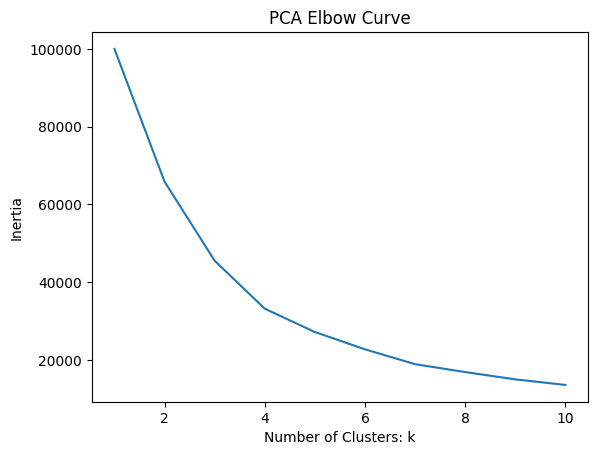

The elbow curve shows that the best k-value is 4.


In [63]:
# Plot the elbow curve using pyplot
plt.plot(elbow_df['k'], elbow_df["inertia"])
plt.xlabel("Number of Clusters: k")
plt.ylabel("Inertia")
plt.title("PCA Elbow Curve")
plt.show()

print(f"The elbow curve shows that the best k-value is 4.")

### K-means with PCA Data

### 1. Try with k = 4.

In [64]:
# Initialize the K-means model with k=4 (based on the plot above)
model = KMeans(n_clusters=4, random_state=0)

# Fit the model to the PCA
model.fit(liver_pca_df)


KMeans(n_clusters=4, random_state=0)

In [65]:
# Predict the clusters
predictions = model.predict(liver_pca_df)

# Print the predictions
print(predictions)

[1 2 1 ... 1 1 2]


In [66]:
# Create copy of PCA df
pca_df_predictions = liver_pca_df.copy()

# Add a column to the new df with the predicted clusters
pca_df_predictions['pca_clusters'] = predictions

# Preview the df
pca_df_predictions.head()

PCA1      PCA2      PCA3  pca_clusters
0 -2.164407 -0.232156 -0.444197             1
1  0.639312 -3.006915  4.390364             2
2 -2.389049 -1.749353 -0.629321             1
3 -1.255756 -0.600916 -0.397726             1
4 -0.443700  1.570070 -0.419314             3

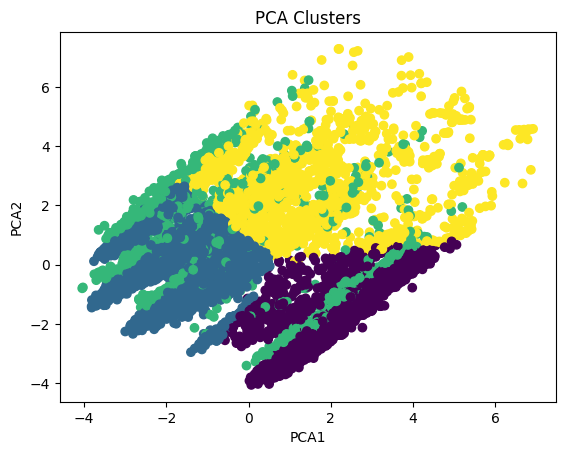

In [68]:
# Scatter plot of the predicted clusters
plt.scatter(pca_df_predictions['PCA1'], pca_df_predictions['PCA2'], c=pca_df_predictions['pca_clusters'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Clusters')
plt.show()

### 2. Try with k = 3

In [69]:
# Initialize the K-means model with k=3
model = KMeans(n_clusters=3, random_state=0)

# Fit the model to the PCA
model.fit(liver_pca_df)

KMeans(n_clusters=3, random_state=0)

In [70]:
# Predict the clusters
predictions = model.predict(liver_pca_df)

# Print the predictions
print(predictions)

[0 2 0 ... 0 0 1]


In [71]:
# Create copy of PCA df
pca_df_predictions = liver_pca_df.copy()

# Add a column to the new df with the predicted clusters
pca_df_predictions['pca_clusters'] = predictions

# Preview the df
pca_df_predictions.head()

PCA1      PCA2      PCA3  pca_clusters
0 -2.164407 -0.232156 -0.444197             0
1  0.639312 -3.006915  4.390364             2
2 -2.389049 -1.749353 -0.629321             0
3 -1.255756 -0.600916 -0.397726             0
4 -0.443700  1.570070 -0.419314             1

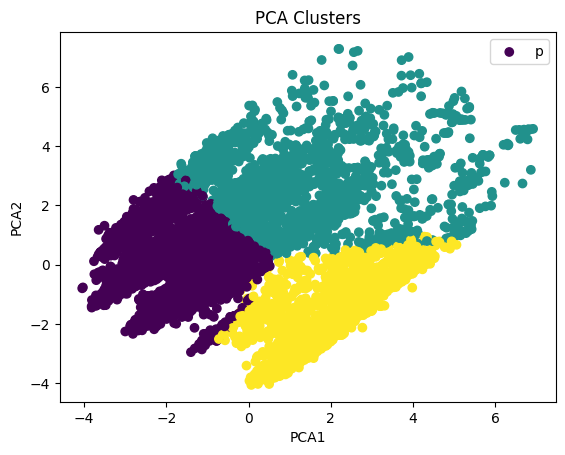

In [74]:
# Scatter plot of the predicted clusters
plt.scatter(pca_df_predictions['PCA1'], pca_df_predictions['PCA2'], c=pca_df_predictions['pca_clusters'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Clusters')
plt.legend('pca_clusters')
plt.show()